In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Número de jogadores
num_samples = 10000

#Máximo e mínimo para cada jogada
maximo = 100
minimo = 0

#Distribuição da regra de decisão de cada jogador
#(recusa se o a oferta for menor que a regra)
m_decisao = 30
d_decisao = 5

#Distribuição das jogadas
m_jogo = 40
d_jogo = 7


#Jogador racional
jogada_racional = 1
decisão_racional = 1

#Inicializa dataframe
df = pd.DataFrame()

#Número de rodadas
nrodadas = 1000

In [29]:
# Cria coluna de decisao com o jogador racional em primeiro lugar
df['decisao'] = np.clip(np.random.normal(m_decisao, d_decisao, num_samples), minimo,maximo).astype(int)
df.at[0, 'decisao'] = decisão_racional  # Definir o primeiro item como 0.1

# Criar um dicionário para armazenar todas as rodadas antes da concatenação
dados_rodadas = {}

for i in range(nrodadas):
    coluna_joga = f'rodada-{i:03d}'
    
    # Gerar valores da rodada de uma vez e armazenar no dicionário
    dados_rodadas[coluna_joga] = np.clip(np.random.normal(m_jogo, d_jogo, num_samples), minimo, maximo).astype(int)

    # Adiciona jogador racional
    idx_joga = np.random.randint(0, num_samples)
    dados_rodadas[coluna_joga][idx_joga] = jogada_racional

# Criar DataFrame com todas as rodadas e concatenar ao df original
df_rodadas = pd.DataFrame(dados_rodadas)
df = pd.concat([df, df_rodadas], axis=1)

# Criar a coluna 'total' somando apenas valores maiores que 'decisao'
colunas_rodada = [col for col in df.columns if col.startswith("rodada")]
df['total'] = df[colunas_rodada].apply(lambda row: row[row > df.loc[row.name, 'decisao']].sum(), axis=1)/nrodadas

#Exporta df para CSV
df.to_csv('df.csv',index=False)

In [36]:
df

,decisao,rodada-000,rodada-001,rodada-002,rodada-003,rodada-004,rodada-005,rodada-006,rodada-007,rodada-008,...,rodada-991,rodada-992,rodada-993,rodada-994,rodada-995,rodada-996,rodada-997,rodada-998,rodada-999,total
0,1,43,29,41,32,28,43,48,37,39,...,49,36,36,55,40,42,40,27,46,39.411
1,25,41,44,51,48,43,39,30,24,49,...,35,50,32,39,52,39,41,39,40,39.346
2,40,35,29,40,35,40,46,48,37,44,...,41,46,46,29,31,33,36,35,45,21.044
3,34,39,43,43,41,42,43,35,36,34,...,41,36,29,33,48,36,39,29,40,32.389
4,29,41,35,44,40,46,21,32,32,42,...,38,39,45,35,36,43,36,38,47,37.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,50,53,37,40,29,25,36,46,43,...,35,35,44,37,49,39,31,46,34,36.894
9996,30,50,28,37,49,48,40,42,39,44,...,41,40,26,42,42,33,38,41,42,37.288
9997,33,43,31,37,35,39,38,35,31,39,...,48,41,39,31,34,44,34,40,46,32.856
9998,35,35,42,37,51,39,43,43,37,39,...,44,48,50,40,32,45,43,28,37,30.626


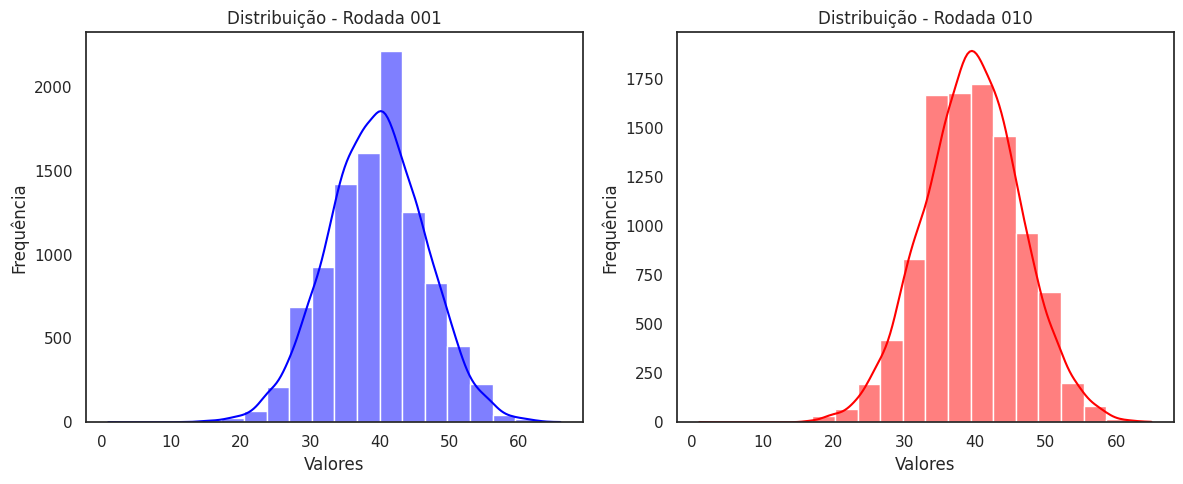

In [32]:
# Criar figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="white")

# Histograma da Rodada 001
sns.histplot(df['rodada-001'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribuição - Rodada 001')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frequência')

# Histograma da Rodada 010
sns.histplot(df['rodada-010'], bins=20, kde=True, color='red', ax=axes[1])
axes[1].set_title('Distribuição - Rodada 010')
axes[1].set_xlabel('Valores')
axes[1].set_ylabel('Frequência')

# Ajustar layout para melhor visualização
plt.tight_layout()

#Salva image
plt.savefig('rodadas.png', dpi=600)
# Exibir o gráfico
plt.show()


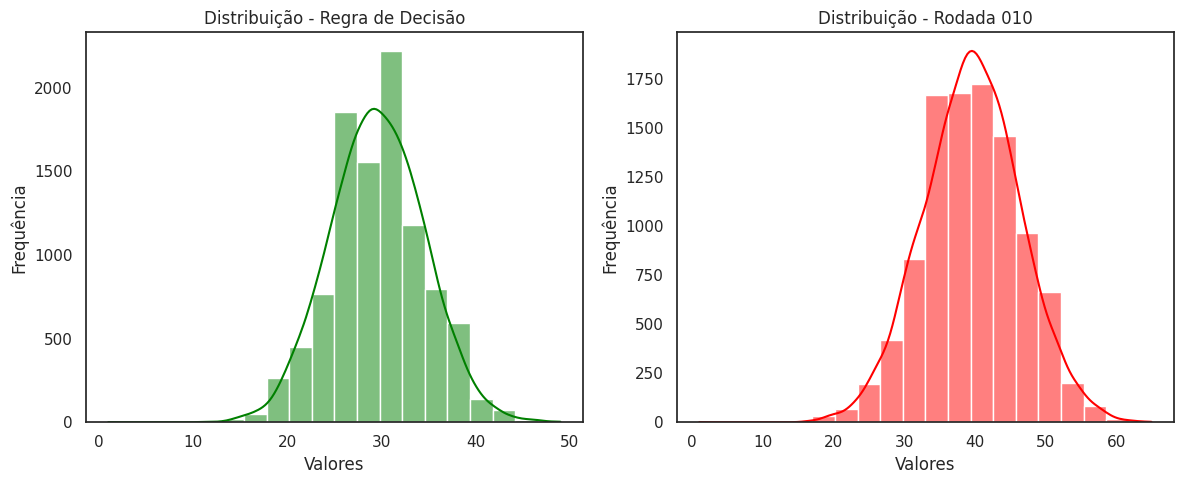

In [33]:
# Criar figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="white")

# Histograma da Rodada 001
sns.histplot(df['decisao'], bins=20, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribuição - Regra de Decisão')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frequência')

# Histograma da Rodada 010
sns.histplot(df['rodada-010'], bins=20, kde=True, color='red', ax=axes[1])
axes[1].set_title('Distribuição - Rodada 010')
axes[1].set_xlabel('Valores')
axes[1].set_ylabel('Frequência')

# Ajustar layout para melhor visualização
plt.tight_layout()

#Salva image
plt.savefig('decisao.png', dpi=600)

# Exibir o gráfico
plt.show()

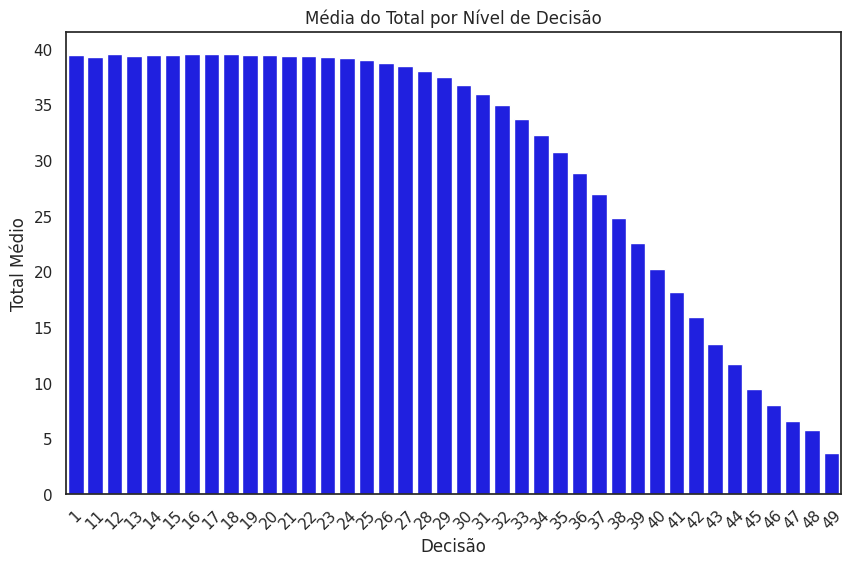

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

dfa = df[['decisao','total']].groupby('decisao').mean()

sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
sns.barplot(x=dfa.index, y=dfa['total'], color="blue")

plt.xlabel("Decisão")
plt.ylabel("Total Médio")
plt.title("Média do Total por Nível de Decisão")
plt.xticks(rotation=45)

#Salva image
plt.savefig('media-por-decisao.png', dpi=600)

plt.show()